In [88]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)         

artifacts = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/artifacts.csv")
artifact_release = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/artifact_release.csv")
release = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/releases.csv")
# added_values = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/added_values.csv")
# dependency = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/dependencies.csv")

In [89]:
artifacts

,artifact_id,artifact_found
0,com.splendo.kaluga:alerts-androidlib,True
1,org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core,True
2,org.apache.camel.quarkus:camel-quarkus-kotlin-parent,True
3,io.projectreactor:reactor-scala-extensions_2.11,True
4,com.lihaoyi:ammonite-shell_2.10.5,True
...,...,...
658073,org.webjars.npm:quickbit-universal,False
658074,org.webjars.npm:random-array-iterator,False
658075,org.webjars.npm:crc-universal,False
658076,io.github.vooft:highlevel-wasm-js,False


In [91]:
artifacts['artifact_found'].value_counts()

artifact_found
True     634663
False     23415
Name: count, dtype: int64

In [90]:
artifact_release

,artifact_id,release_id
0,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:1.4.0
1,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:1.3.1
2,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:1.3.0
3,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:0.1.10
4,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:0.1.11
...,...,...
14459134,io.openliberty.features:io.openliberty.internal.versionless.jsp-3.1,io.openliberty.features:io.openliberty.internal.versionless.jsp-3.1:24.0.0.8
14459135,cn.vividcode.multiplatform:route-api-android,cn.vividcode.multiplatform:route-api-android:0.1.0
14459136,cn.vividcode.multiplatform:route-api-android,cn.vividcode.multiplatform:route-api-android:0.1.1
14459137,cn.vividcode.multiplatform:route-api-android,cn.vividcode.multiplatform:route-api-android:0.1.2


In [92]:
artifact_release['artifact_id'].nunique()

635003

In [48]:
release['release_timestamp'] = pd.to_datetime(release['release_timestamp'], unit='ms')


In [49]:
# Merge artifacts with their releases
artifact_releases = pd.merge(artifact_release, release, on='release_id', how='inner')
artifact_releases = pd.merge(artifact_releases, artifacts[['artifact_id']], on='artifact_id', how='inner')


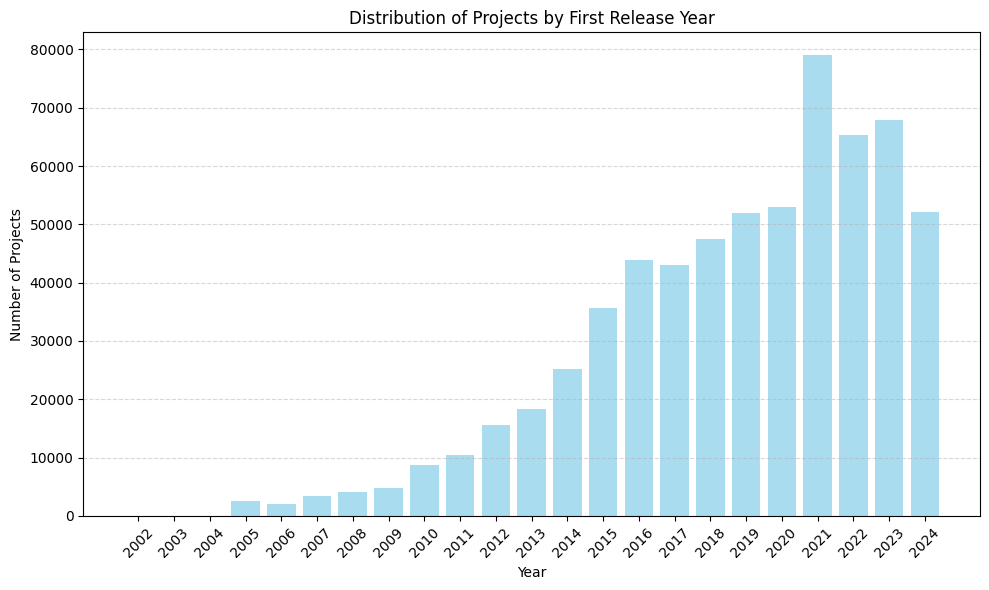

In [50]:
import matplotlib.pyplot as plt

# Calculate the first release date for each artifact
artifact_first_release = artifact_releases.groupby('artifact_id').agg(
    first_release=('release_timestamp', 'min')
).reset_index()

# Extract the year of the first release
artifact_first_release['first_release_year'] = artifact_first_release['first_release'].dt.year

# Count the number of projects by first release year
first_release_distribution = artifact_first_release['first_release_year'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(first_release_distribution.index, first_release_distribution.values, color='skyblue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Distribution of Projects by First Release Year')
plt.xticks(first_release_distribution.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [51]:
artifact_releases

,artifact_id,release_id,release_version,release_timestamp
0,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:1.4.0,1.4.0,2024-06-11 15:43:33
1,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:1.3.1,1.3.1,2023-12-19 14:35:51
2,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:1.3.0,1.3.0,2023-11-10 18:59:26
3,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:0.1.10,0.1.10,2021-05-04 10:46:51
4,com.splendo.kaluga:alerts-androidlib,com.splendo.kaluga:alerts-androidlib:0.1.11,0.1.11,2021-06-02 16:17:20
...,...,...,...,...
14459134,io.openliberty.features:io.openliberty.internal.versionless.jsp-3.1,io.openliberty.features:io.openliberty.internal.versionless.jsp-3.1:24.0.0.8,24.0.0.8,2024-08-12 21:40:11
14459135,cn.vividcode.multiplatform:route-api-android,cn.vividcode.multiplatform:route-api-android:0.1.0,0.1.0,2024-06-05 12:43:34
14459136,cn.vividcode.multiplatform:route-api-android,cn.vividcode.multiplatform:route-api-android:0.1.1,0.1.1,2024-06-06 16:00:54
14459137,cn.vividcode.multiplatform:route-api-android,cn.vividcode.multiplatform:route-api-android:0.1.2,0.1.2,2024-06-23 10:50:54


In [52]:
artifact_releases['artifact_id'].nunique()

635003

In [53]:
# Define the date range
start_date = '2014-09-04'
end_date = '2024-09-04'

# Filter the release history to include only records within 2014-2024
filtered_release_history = artifact_releases[
    (artifact_releases['release_timestamp'] >= start_date) &
    (artifact_releases['release_timestamp'] <= end_date)
]
filtered_release_history = filtered_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
13237446,abbot:abbot,abbot:abbot:1.4.0,1.4.0,2015-09-22 15:54:01
10918348,abbot:costello,abbot:costello:1.4.0,1.4.0,2015-09-24 09:21:46
12701068,academy.alex:custommatcher,academy.alex:custommatcher:1.0,1.0,2018-05-31 18:57:25
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [54]:
filtered_release_history['artifact_id'].nunique()

581424

In [55]:

# Group by artifact_id and get the first and last release date per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max'])
# Group by artifact_id and get the first and last release date per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max'])

# Filter to include only projects with both first and last release dates within 2014-2024
valid_projects = release_date_range[
    (release_date_range['min'] >= start_date) &
    (release_date_range['max'] <= end_date)
].index

# Filter the original dataframe to include only valid projects
filtered_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(valid_projects)]
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
13237446,abbot:abbot,abbot:abbot:1.4.0,1.4.0,2015-09-22 15:54:01
10918348,abbot:costello,abbot:costello:1.4.0,1.4.0,2015-09-24 09:21:46
12701068,academy.alex:custommatcher,academy.alex:custommatcher:1.0,1.0,2018-05-31 18:57:25
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [56]:
filtered_release_history['artifact_id'].nunique()

581424

In [57]:
new_project_cutoff = pd.to_datetime('2023-08-30')


# Group by artifact_id to get the first and last release dates and count of releases per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max', 'count'])


In [58]:
release_date_range

,min,max,count
artifact_id,,,
abbot:abbot,2015-09-22 15:54:01,2015-09-22 15:54:01,1
abbot:costello,2015-09-24 09:21:46,2015-09-24 09:21:46,1
academy.alex:custommatcher,2018-05-31 18:57:25,2018-05-31 18:57:25,1
academy.compose.companion:multi-fab,2021-01-05 21:01:38,2021-01-14 06:40:25,3
ae.teletronics.ejabberd:EjabberdXMLRPCClient,2016-10-27 04:48:11,2017-03-14 08:38:12,4
...,...,...,...
zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20
zone.src.sheaf:web-sheaf,2015-01-23 14:53:59,2023-08-21 12:15:54,23
zone.stefan.dev:geocode,2021-01-08 15:30:37,2021-01-08 17:44:45,2


In [59]:
# Apply filters:
# 1. Include projects with more than 1 release
# 2. Include projects with the first release date before August 30, 2023
valid_projects = release_date_range[
    (release_date_range['count'] > 1) &  # More than 1 release
    (release_date_range['min'] < new_project_cutoff)  # First release before August 30, 2023
].index

valid_projects

Index(['academy.compose.companion:multi-fab',
       'ae.teletronics.ejabberd:EjabberdXMLRPCClient',
       'ae.teletronics.nlp:categorisation',
       'ae.teletronics.nlp:entityextraction',
       'ae.teletronics.nlp:language-detector', 'ae.teletronics.peers:peers',
       'ae.teletronics.peers:peers-demo', 'ae.teletronics.peers:peers-doc',
       'ae.teletronics.peers:peers-gui', 'ae.teletronics.peers:peers-lib',
       ...
       'zone.refactor.spring:hateoas', 'zone.refactor.spring:validation',
       'zone.src.sheaf:java-sheaf', 'zone.src.sheaf:logback-sheaf',
       'zone.src.sheaf:sheaf-deps-bom', 'zone.src.sheaf:sheaf-parent',
       'zone.src.sheaf:web-sheaf', 'zone.stefan.dev:geocode',
       'zone.wmj:user-agent-util', 'zw.co.paynow:java-sdk'],
      dtype='object', name='artifact_id', length=403048)

In [60]:
filtered_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(valid_projects)]
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [61]:
filtered_release_history['artifact_id'].nunique()

403048

In [62]:
abandonment_cutoff = pd.to_datetime('2022-09-04')


In [63]:
# Identify the last release date per project
last_release_per_project = filtered_release_history.groupby('artifact_id')['release_timestamp'].max()
last_release_per_project

artifact_id
academy.compose.companion:multi-fab            2021-01-14 06:40:25
ae.teletronics.ejabberd:EjabberdXMLRPCClient   2017-03-14 08:38:12
ae.teletronics.nlp:categorisation              2017-01-05 08:41:51
ae.teletronics.nlp:entityextraction            2016-09-30 12:52:02
ae.teletronics.nlp:language-detector           2016-04-26 06:41:12
                                                       ...        
zone.src.sheaf:sheaf-parent                    2023-08-21 09:29:38
zone.src.sheaf:web-sheaf                       2023-08-21 12:15:54
zone.stefan.dev:geocode                        2021-01-08 17:44:45
zone.wmj:user-agent-util                       2022-06-16 07:45:05
zw.co.paynow:java-sdk                          2019-06-14 09:50:47
Name: release_timestamp, Length: 403048, dtype: datetime64[ns]

In [64]:
# Classify projects as abandoned or active
abandoned_projects = last_release_per_project[last_release_per_project <= abandonment_cutoff].index
active_projects = last_release_per_project[last_release_per_project > abandonment_cutoff].index


In [65]:
# Filter the original dataframe to create abandoned and active project datasets
abandoned_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(abandoned_projects)]
active_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(active_projects)]


In [66]:
abandoned_release_history

,artifact_id,release_id,release_version,release_timestamp
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [67]:
abandoned_release_history['artifact_id'].nunique()

206768

In [68]:
active_release_history['artifact_id'].nunique()

196280

In [69]:
# Define thresholds
active_threshold = pd.Timedelta(days=180)  # 6 months
dormant_threshold = pd.Timedelta(days=365)  # 1 years

In [70]:
# Sort by artifact_id and release_timestamp to calculate intervals in both active and abandoned projects
active_release_history = active_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
abandoned_release_history = abandoned_release_history.sort_values(by=['artifact_id', 'release_timestamp'])


In [71]:
# Calculate time intervals for active releases
active_release_history['time_to_next_release'] = active_release_history.groupby('artifact_id')['release_timestamp'].diff(-1).abs()
active_release_history['time_since_last_release'] = active_release_history.groupby('artifact_id')['release_timestamp'].diff().abs()


In [72]:
# # Function to label each release in active projects
# def label_active_dormant_release(row):
#     if (row['time_since_last_release'] <= active_threshold) or (row['time_to_next_release'] <= active_threshold):
#         return 'Active'
#     elif (row['time_since_last_release'] <= dormant_threshold) or (row['time_to_next_release'] <= dormant_threshold):
#         return 'Dormant'
#     else:
#         return 'Dormant'  # Default to Dormant for intervals beyond active threshold

def label_active_dormant_release(row):
    # Check if it's the first or last release in the project sequence
    if pd.isna(row['time_since_last_release']) or pd.isna(row['time_to_next_release']):
        return 'Active'  # Label first and last releases as Active
    # Middle releases: Active if within the active threshold
    elif (row['time_since_last_release'] <= active_threshold) or (row['time_to_next_release'] <= active_threshold):
        return 'Active'
    # Dormant if within dormant threshold but beyond active threshold
    elif (row['time_since_last_release'] <= dormant_threshold) or (row['time_to_next_release'] <= dormant_threshold):
        return 'Dormant'
    else:
        return 'Dormant'  # Default to Dormant for longer intervals


In [73]:
# Apply labeling function to active releases
active_release_history['release_label'] = active_release_history.apply(label_active_dormant_release, axis=1)
active_release_history
# Calculate time intervals for abandoned releases
abandoned_release_history = abandoned_release_history.sort_values(by=['artifact_id', 'release_timestamp'])

abandoned_release_history['time_to_next_release'] = abandoned_release_history.groupby('artifact_id')['release_timestamp'].diff(-1).abs()
abandoned_release_history['time_since_last_release'] = abandoned_release_history.groupby('artifact_id')['release_timestamp'].diff().abs()


In [74]:
active_release_history

,artifact_id,release_id,release_version,release_timestamp,time_to_next_release,time_since_last_release,release_label
11968360,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.2,0.2.2,2015-05-02 01:12:05,1 days 19:54:58,NaT,Active
11968358,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.3,0.2.3,2015-05-03 21:07:03,366 days 13:44:51,1 days 19:54:58,Active
11968359,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.4,0.2.4,2016-05-04 10:51:54,2457 days 11:18:50,366 days 13:44:51,Dormant
11968357,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.5,0.2.5,2023-01-25 22:10:44,0 days 00:48:34,2457 days 11:18:50,Active
11968356,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.6,0.2.6,2023-01-25 22:59:18,0 days 00:13:27,0 days 00:48:34,Active
...,...,...,...,...,...,...,...
10719749,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,1051 days 06:53:29,205 days 08:47:45,Dormant
10719746,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,664 days 18:10:41,1051 days 06:53:29,Dormant
10719745,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,22 days 18:19:24,664 days 18:10:41,Active
10719747,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,338 days 00:48:32,22 days 18:19:24,Active


In [87]:
# Specify the artifact_id of the project you want to inspect
artifact_id_to_inspect = 'aero.m-click:mcpdf'

# Filter the abandoned_release_history DataFrame for the specified artifact_id
test = active_release_history[active_release_history['artifact_id'] == artifact_id_to_inspect]

# Sort by release timestamp to view in chronological order
test = test.sort_values(by='release_timestamp').reset_index(drop=True)

# Display the filtered data
test[['artifact_id', 'release_timestamp', 'time_to_next_release', 'time_since_last_release', 'release_label']]

#aero.m-click:mcpdf

,artifact_id,release_timestamp,time_to_next_release,time_since_last_release,release_label
0,aero.m-click:mcpdf,2015-05-02 01:12:05,1 days 19:54:58,NaT,Active
1,aero.m-click:mcpdf,2015-05-03 21:07:03,366 days 13:44:51,1 days 19:54:58,Active
2,aero.m-click:mcpdf,2016-05-04 10:51:54,2457 days 11:18:50,366 days 13:44:51,Dormant
3,aero.m-click:mcpdf,2023-01-25 22:10:44,0 days 00:48:34,2457 days 11:18:50,Active
4,aero.m-click:mcpdf,2023-01-25 22:59:18,0 days 00:13:27,0 days 00:48:34,Active
5,aero.m-click:mcpdf,2023-01-25 23:12:45,2 days 01:28:58,0 days 00:13:27,Active
6,aero.m-click:mcpdf,2023-01-28 00:41:43,0 days 00:39:41,2 days 01:28:58,Active
7,aero.m-click:mcpdf,2023-01-28 01:21:24,0 days 00:20:52,0 days 00:39:41,Active
8,aero.m-click:mcpdf,2023-01-28 01:42:16,NaT,0 days 00:20:52,Active


In [76]:
# Find the last release for each project in active_release_history
last_releases_active = active_release_history.groupby('artifact_id').tail(1)

# Filter to only include projects where the last release is labeled 'Active'
last_active_releases = last_releases_active[last_releases_active['release_label'] == 'Active']

# Identify projects where the release before the last was labeled 'Dormant'
# Get indices of last releases and find the second-to-last releases
second_to_last_releases_active = active_release_history[active_release_history.index.isin(last_active_releases.index - 1)]
projects_with_dormant_before_active = second_to_last_releases_active[
    (second_to_last_releases_active['release_label'] == 'Dormant') &
    (second_to_last_releases_active['artifact_id'].isin(last_active_releases['artifact_id']))
]

# Count and list projects
projects_count_active = projects_with_dormant_before_active['artifact_id'].nunique()
projects_list_active = projects_with_dormant_before_active['artifact_id'].unique()

projects_count_active, projects_list_active


(3304,
 array(['ai.djl.paddlepaddle:paddlepaddle-native-cu102',
        'ai.tock:tock-bot-demo-api-common',
        'ai.ylyue:yue-library-auth-client', ...,
        'za.co.absa:spark-hats_2.12', 'zone.src.sheaf:sheaf-deps-bom',
        'zone.src.sheaf:sheaf-parent'], dtype=object))

In [77]:
# # Function to label each release in abandoned projects
# def label_abandoned_release(row):
#     if row['release_timestamp'] > abandonment_cutoff:
#         return 'Abandoned'
#     elif (row['time_since_last_release'] <= active_threshold) or (row['time_to_next_release'] <= active_threshold):
#         return 'Active'
#     elif (row['time_since_last_release'] <= dormant_threshold) or (row['time_to_next_release'] <= dormant_threshold):
#         return 'Dormant'
#     else:
#         return 'Dormant'
    
# def label_abandoned_release(row, last_release_ids):
#     if row.name in last_release_ids:
#         return 'Abandoned'  # Label the very last release as 'Abandoned'
#     elif (row['time_since_last_release'] <= active_threshold) or (row['time_to_next_release'] <= active_threshold):
#         return 'Active'
#     elif (row['time_since_last_release'] <= dormant_threshold) or (row['time_to_next_release'] <= dormant_threshold):
#         return 'Dormant'
#     else:
#         return 'Dormant'
    
# Function to label each release in abandoned projects
def label_abandoned_release(row, first_release_ids, last_release_ids):
    if row.name in first_release_ids:
        return 'Active'  # Label the very first release as 'Active'
    elif row.name in last_release_ids:
        return 'Abandoned'  # Label the very last release as 'Abandoned'
    elif (row['time_since_last_release'] <= active_threshold) or (row['time_to_next_release'] <= active_threshold):
        return 'Active'
    elif (row['time_since_last_release'] <= dormant_threshold) or (row['time_to_next_release'] <= dormant_threshold):
        return 'Dormant'
    else:
        return 'Dormant'

In [78]:
# last_release_ids = abandoned_release_history.groupby('artifact_id').tail(1).index
# # Apply the labeling function
# abandoned_release_history['release_label'] = abandoned_release_history.apply(
#     label_abandoned_release, axis=1, last_release_ids=last_release_ids
# )


# Identify the first and last release for each project in abandoned_release_history
first_release_ids = abandoned_release_history.groupby('artifact_id').head(1).index
last_release_ids = abandoned_release_history.groupby('artifact_id').tail(1).index


In [79]:
# # Apply labeling function to abandoned releases
# abandoned_release_history['release_label'] = abandoned_release_history.apply(label_abandoned_release, axis=1)
abandoned_release_history['release_label'] = abandoned_release_history.apply(
    label_abandoned_release, axis=1, first_release_ids=first_release_ids, last_release_ids=last_release_ids
)


In [80]:
abandoned_release_history

,artifact_id,release_id,release_version,release_timestamp,time_to_next_release,time_since_last_release,release_label
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,1 days 23:42:44,NaT,Active
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,6 days 09:56:03,1 days 23:42:44,Active
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,NaT,6 days 09:56:03,Abandoned
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,136 days 03:41:19,NaT,Active
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,1 days 00:18:22,136 days 03:41:19,Active
...,...,...,...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18,53 days 15:28:47,43 days 06:34:37,Active
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05,NaT,53 days 15:28:47,Abandoned
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11,59 days 18:46:39,NaT,Active
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50,79 days 01:37:57,59 days 18:46:39,Active


In [81]:
abandoned_release_history['release_label'].value_counts()

release_label
Active       2666377
Abandoned     206768
Dormant        21997
Name: count, dtype: int64

In [82]:
# Specify the artifact_id of the project you want to inspect
artifact_id_to_inspect = 'za.co.monadic:scopus_2.12'

# Filter the abandoned_release_history DataFrame for the specified artifact_id
test = abandoned_release_history[abandoned_release_history['artifact_id'] == artifact_id_to_inspect]

# Sort by release timestamp to view in chronological order
test = test.sort_values(by='release_timestamp').reset_index(drop=True)

# Display the filtered data
test[['artifact_id', 'release_timestamp', 'time_to_next_release', 'time_since_last_release', 'release_label']]


,artifact_id,release_timestamp,time_to_next_release,time_since_last_release,release_label
0,za.co.monadic:scopus_2.12,2016-12-19 09:20:16,67 days 01:07:12,NaT,Active
1,za.co.monadic:scopus_2.12,2017-02-24 10:27:28,265 days 08:13:42,67 days 01:07:12,Active
2,za.co.monadic:scopus_2.12,2017-11-16 18:41:10,0 days 14:41:45,265 days 08:13:42,Active
3,za.co.monadic:scopus_2.12,2017-11-17 09:22:55,83 days 05:27:19,0 days 14:41:45,Active
4,za.co.monadic:scopus_2.12,2018-02-08 14:50:14,165 days 18:04:27,83 days 05:27:19,Active
5,za.co.monadic:scopus_2.12,2018-07-24 08:54:41,9 days 22:53:08,165 days 18:04:27,Active
6,za.co.monadic:scopus_2.12,2018-08-03 07:47:49,453 days 02:21:22,9 days 22:53:08,Active
7,za.co.monadic:scopus_2.12,2019-10-30 10:09:11,238 days 05:14:05,453 days 02:21:22,Dormant
8,za.co.monadic:scopus_2.12,2020-06-24 15:23:16,459 days 18:42:55,238 days 05:14:05,Dormant
9,za.co.monadic:scopus_2.12,2021-09-27 10:06:11,23 days 20:50:37,459 days 18:42:55,Active


In [83]:
#au.com.dius:pact-jvm-matchers_2.10

In [84]:
# Find the last release for each project
last_releases = abandoned_release_history.groupby('artifact_id').tail(1)

# Filter to only include projects where the last release is labeled 'Abandoned'
last_abandoned_releases = last_releases[last_releases['release_label'] == 'Abandoned']

# Identify projects where the release before the last was labeled 'Dormant'
# Get indices of last releases and find the second-to-last releases
second_to_last_releases = abandoned_release_history[abandoned_release_history.index.isin(last_abandoned_releases.index - 1)]
projects_with_dormant_before_abandoned = second_to_last_releases[
    (second_to_last_releases['release_label'] == 'Dormant') &
    (second_to_last_releases['artifact_id'].isin(last_abandoned_releases['artifact_id']))
]

# Count and list projects
projects_count = projects_with_dormant_before_abandoned['artifact_id'].nunique()
projects_list = projects_with_dormant_before_abandoned['artifact_id'].unique()

projects_count, projects_list

(4126,
 array(['ai.djl.mxnet:mxnet-native-mkl', 'ai.x:typeless_2.11',
        'app.myoss.wechat:wechat-starter-mini-app', ...,
        'ws.wamp.jawampa:jawampa-parent', 'xyz.cofe:gui.swing',
        'za.co.monadic:scopus_2.12'], dtype=object))

In [85]:
projects_list

array(['ai.djl.mxnet:mxnet-native-mkl', 'ai.x:typeless_2.11',
       'app.myoss.wechat:wechat-starter-mini-app', ...,
       'ws.wamp.jawampa:jawampa-parent', 'xyz.cofe:gui.swing',
       'za.co.monadic:scopus_2.12'], dtype=object)